In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

## Request to server and get response

In [ ]:
session_request = requests.session()
url = "https://www.imdb.com/title/tt6723592/reviews?ref_=tt_urv"
response = session_request.get(url)
print(response)

<Response [200]>


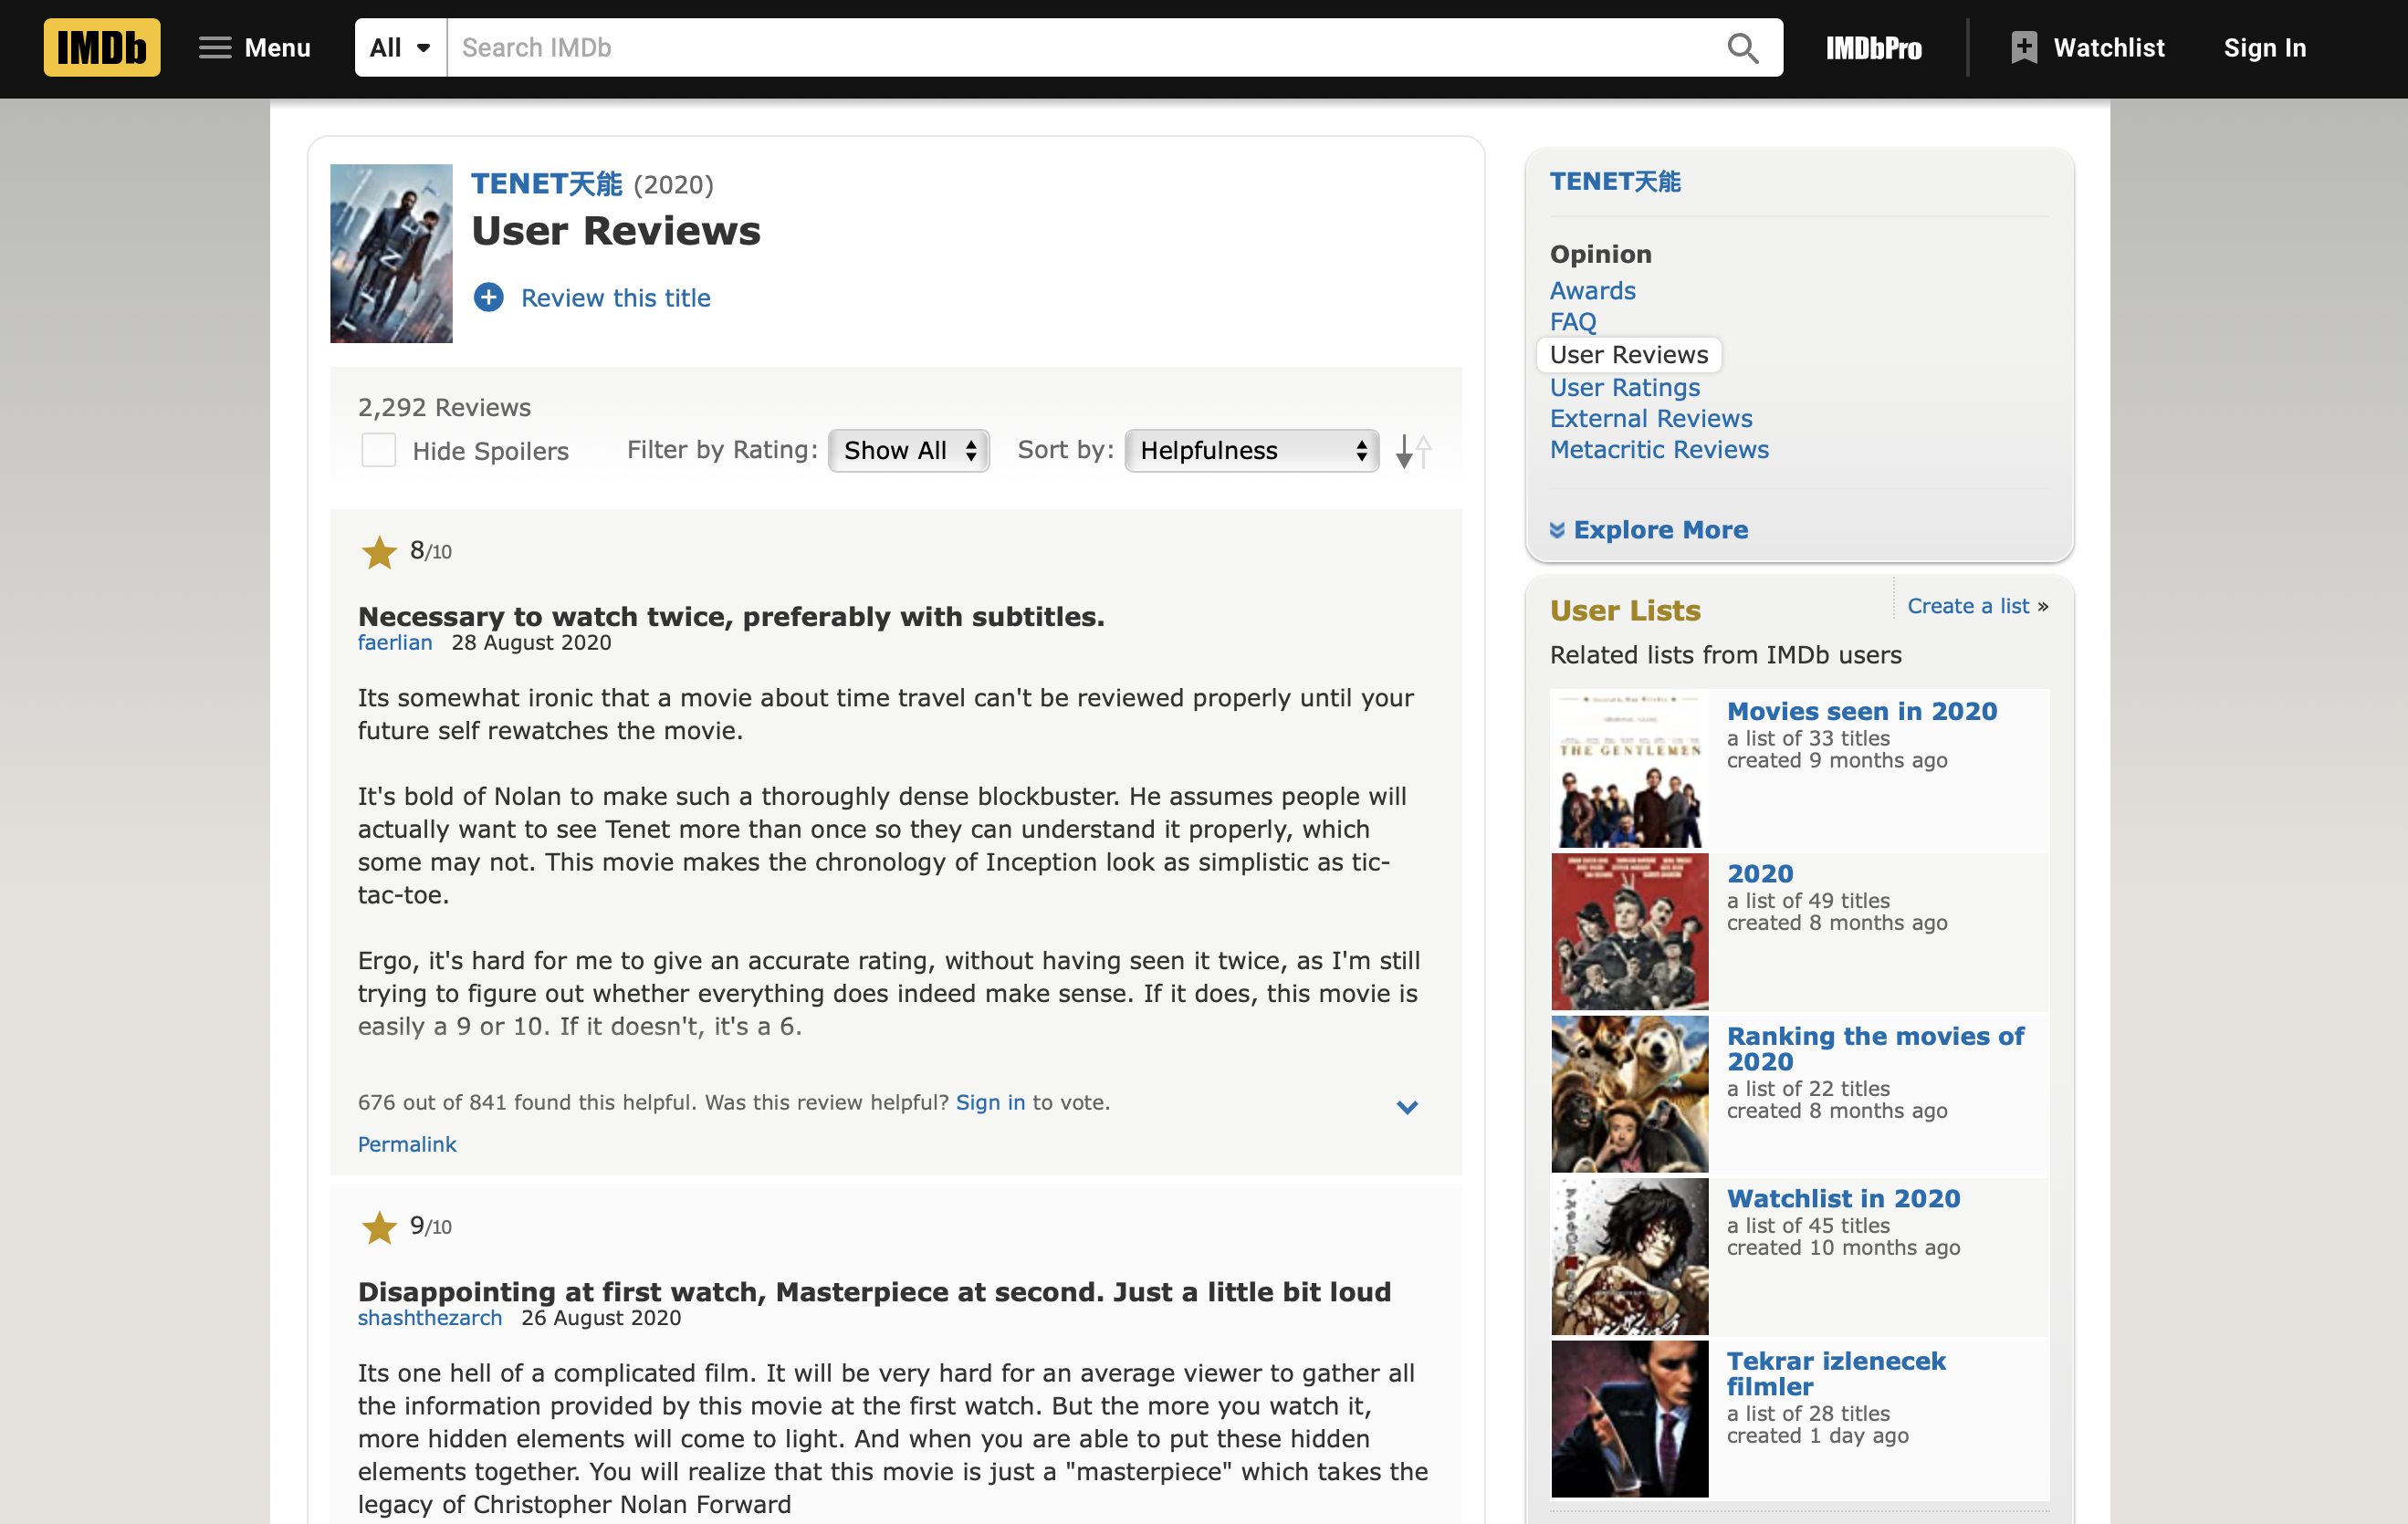

The html of the page

In [ ]:
# print(response.text)

## Use parser to refine the html text

In [ ]:
soup = BeautifulSoup(response.text, "html.parser")
# print(soup)
# print(soup.prettify())

## Select parts in the html text
- Title
- Rate
- Review 

### Select title

In [ ]:
# elements = soup.select("div.text show-more__control")
element_title = soup.select("a.title")

In [ ]:
title_list = []
for item in element_title:
  # print(i.text)
  text = item.text.replace("\n",'')
  title_list.append(text)

In [ ]:
title_list

[' Necessary to watch twice, preferably with subtitles.',
 ' Disappointing at first watch, Masterpiece at second. Just a little bit loud',
 " I think I'm dumb",
 " Spectacular. But only Nolan and Schrödinger's cat knows what's going on.",
 ' Brief, Non-Spoiler review',
 ' Brilliant Film',
 ' Loud and impenetrable',
 ' An absolute masterpiece!',
 ' Tenet is built like a puzzle with a story that folds over itself enough times to make you believe the screenplay was built from origami.',
 ' Christopher Nolan does it again',
 ' Pseudo-intellectual mindless action/WASTE OF TIME (movie also speaks in CAPS LOCK!)',
 ' Vrummmmmmmmmmm brummmmmmmmmmm',
 ' Lots of potential, but chaotic and at tee end, unsatisfying',
 ' Audio needs fixing',
 ' Interesting but hard to understand.. literally',
 ' Nolan has officially out-Nolaned himself',
 " An aesthetic showcase that's completely uninterested in human beings (and for the love of God, what does Christopher Nolan have against decent sound mixing?)",


### Select rate
- some of the review do not have rate, so we should check in advance
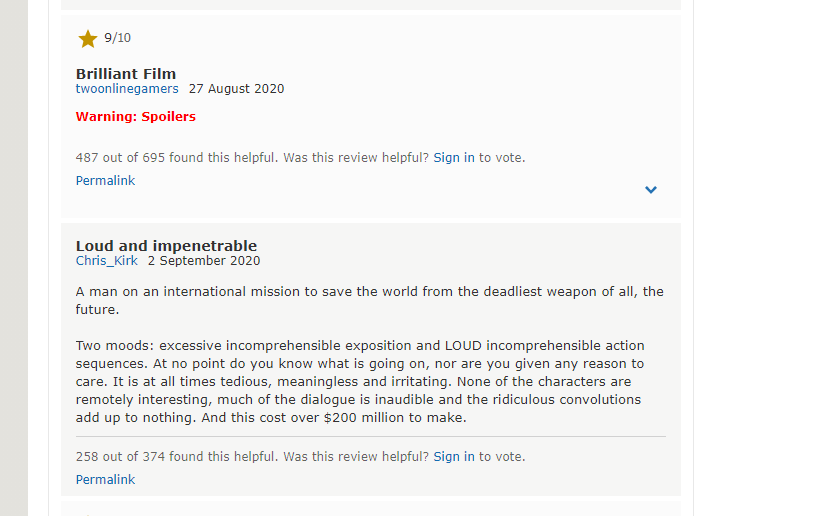

In [ ]:
element_rate = soup.select("div.ipl-ratings-bar span span")
# print(element_rate)

In [ ]:
element_rate_test = soup.select("div.lister-item-content")  # check in advance
# element_rate_test[0].span.span
"ipl-ratings-bar" in str(element_rate_test[0]) # check whether the reivew contain rating bar

True

### If the reivew do not contain rate bar, then assign -1 to its rate

In [ ]:
rate_test_list = []
for item in element_rate_test:
  if "ipl-ratings-bar" not in str(item):
    rate_test_list.append(int(-1))
  else:
    rate_test_list.append(int(item.span.span.text))
  # print(str(item))
print(rate_test_list)
# for i in rate_test_list:
#   print(i,type(i))

[8, 9, 7, 7, 9, 9, -1, 9, 9, 10, 5, -1, 5, 6, 4, 5, 2, 4, 8, 6, 7, 6, 1, 3, 3]


### The case that we do not check the rate bar

In [ ]:
rate_list = []
for item in element_rate:
  if "class" not in str(item):
    # rate = int(str(item).replace("<span>","").replace("</span>",""))
    rate_list.append(int(item.text))
  # print(str(item))
print(rate_list)

[8, 9, 7, 7, 9, 9, 9, 9, 10, 5, 5, 6, 4, 5, 2, 4, 8, 6, 7, 6, 1, 3, 3]


### Selcet review

In [ ]:
element_review = soup.select("div.text.show-more__control")
element_review

[<div class="text show-more__control">Its somewhat ironic that a movie about time travel can't be reviewed properly until your future self rewatches the movie.<br/><br/>It's bold of Nolan to make such a thoroughly dense blockbuster. He assumes people will actually want to see Tenet more than once so they can understand it properly, which some may not. This movie makes the chronology of Inception look as simplistic as tic-tac-toe.<br/><br/>Ergo, it's hard for me to give an accurate rating, without having seen it twice, as I'm still trying to figure out whether everything does indeed make sense. If it does, this movie is easily a 9 or 10. If it doesn't, it's a 6.<br/><br/>It's further not helped by the fact that the dialogue in the first 15 minutes of the movie is painfully hard to understand / hear. Either they were behind masks; they were practically mumbling; the sound effects were too loud; or all of the above. The exposition scenes are also waayyy too brief for something this comple

In [ ]:
review_list = []
for item in element_review:
  review_list.append(item.text)
  # print(str(item))
print(review_list)

['Its somewhat ironic that a movie about time travel can\'t be reviewed properly until your future self rewatches the movie.It\'s bold of Nolan to make such a thoroughly dense blockbuster. He assumes people will actually want to see Tenet more than once so they can understand it properly, which some may not. This movie makes the chronology of Inception look as simplistic as tic-tac-toe.Ergo, it\'s hard for me to give an accurate rating, without having seen it twice, as I\'m still trying to figure out whether everything does indeed make sense. If it does, this movie is easily a 9 or 10. If it doesn\'t, it\'s a 6.It\'s further not helped by the fact that the dialogue in the first 15 minutes of the movie is painfully hard to understand / hear. Either they were behind masks; they were practically mumbling; the sound effects were too loud; or all of the above. The exposition scenes are also waayyy too brief for something this complex -- a problem also shared with Interstellar actually.(Inte

## Check the length of each list

In [ ]:
out = f"""
review length: {len(review_list)}
rate length: {len(rate_test_list)}
title length: {len(title_list)}
"""
# print(f"review {len(review_list)},len(rate_test_list),len(title_list)")
print(out)
# print(rate_list)


review length: 25
rate length: 25
title length: 25



## Create a dataframe to store these list

In [ ]:
df = pd.DataFrame(np.c_[title_list,review_list,rate_test_list],columns = ["title","review","rate"])
df

,title,review,rate
0,"Necessary to watch twice, preferably with sub...",Its somewhat ironic that a movie about time tr...,8
1,"Disappointing at first watch, Masterpiece at ...",Its one hell of a complicated film. It will be...,9
2,I think I'm dumb,"Well, I've always known I was a little slow to...",7
3,Spectacular. But only Nolan and Schrödinger's...,Tenet is the long awaited new movie from Chris...,7
4,"Brief, Non-Spoiler review","As this will be non-spoiler, I can't say too m...",9
5,Brilliant Film,"If you can, get to a cinema and watch Tenet.If...",9
6,Loud and impenetrable,A man on an international mission to save the ...,-1
7,An absolute masterpiece!,"At first, I want to ask Christopher Nolan one ...",9
8,Tenet is built like a puzzle with a story tha...,It's been a long and bumpy road to release but...,9
9,Christopher Nolan does it again,One of Christopher Nolan's most fascinating mo...,10


## Check the info
- column
- data count
- data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   25 non-null     object
 1   review  25 non-null     object
 2   rate    25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


## Change the type of rate

In [ ]:
df["rate"] = df["rate"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   25 non-null     object
 1   review  25 non-null     object
 2   rate    25 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 728.0+ bytes


## Drop the ones that do not have rate bar (assigned as -1)

In [ ]:
condition = df["rate"] > 0
df_filter = df[condition]
df_filter

,title,review,rate
0,"Necessary to watch twice, preferably with sub...",Its somewhat ironic that a movie about time tr...,8
1,"Disappointing at first watch, Masterpiece at ...",Its one hell of a complicated film. It will be...,9
2,I think I'm dumb,"Well, I've always known I was a little slow to...",7
3,Spectacular. But only Nolan and Schrödinger's...,Tenet is the long awaited new movie from Chris...,7
4,"Brief, Non-Spoiler review","As this will be non-spoiler, I can't say too m...",9
5,Brilliant Film,"If you can, get to a cinema and watch Tenet.If...",9
7,An absolute masterpiece!,"At first, I want to ask Christopher Nolan one ...",9
8,Tenet is built like a puzzle with a story tha...,It's been a long and bumpy road to release but...,9
9,Christopher Nolan does it again,One of Christopher Nolan's most fascinating mo...,10
10,Pseudo-intellectual mindless action/WASTE OF ...,"Big Nolan fan here. Doodlebug, Memento, The Pr...",5


In [ ]:
# df_filter.info()

### Reset index

In [ ]:
# df_filter
# df_filter = df_filter.drop()
# del df_filter["level_0"]
# del df_filter["index"]
df_filter = df_filter.reset_index(drop=True)
df_filter

,title,review,rate
0,"Necessary to watch twice, preferably with sub...",Its somewhat ironic that a movie about time tr...,8
1,"Disappointing at first watch, Masterpiece at ...",Its one hell of a complicated film. It will be...,9
2,I think I'm dumb,"Well, I've always known I was a little slow to...",7
3,Spectacular. But only Nolan and Schrödinger's...,Tenet is the long awaited new movie from Chris...,7
4,"Brief, Non-Spoiler review","As this will be non-spoiler, I can't say too m...",9
5,Brilliant Film,"If you can, get to a cinema and watch Tenet.If...",9
6,An absolute masterpiece!,"At first, I want to ask Christopher Nolan one ...",9
7,Tenet is built like a puzzle with a story tha...,It's been a long and bumpy road to release but...,9
8,Christopher Nolan does it again,One of Christopher Nolan's most fascinating mo...,10
9,Pseudo-intellectual mindless action/WASTE OF ...,"Big Nolan fan here. Doodlebug, Memento, The Pr...",5


## Add new column for binary classification

In [ ]:
# binary = 1 if df_filter["rate"] > 5 else 0
def binary(column):
  bin = []
  for i in range(len(column)):
    if column[i] > 5:
      bin.append(1)
    else:
      bin.append(0)
  return np.array(bin)
bin = binary(df_filter["rate"])
df_filter['positive/negative'] = bin
df_filter

,title,review,rate,positive/negative
0,"Necessary to watch twice, preferably with sub...",Its somewhat ironic that a movie about time tr...,8,1
1,"Disappointing at first watch, Masterpiece at ...",Its one hell of a complicated film. It will be...,9,1
2,I think I'm dumb,"Well, I've always known I was a little slow to...",7,1
3,Spectacular. But only Nolan and Schrödinger's...,Tenet is the long awaited new movie from Chris...,7,1
4,"Brief, Non-Spoiler review","As this will be non-spoiler, I can't say too m...",9,1
5,Brilliant Film,"If you can, get to a cinema and watch Tenet.If...",9,1
6,An absolute masterpiece!,"At first, I want to ask Christopher Nolan one ...",9,1
7,Tenet is built like a puzzle with a story tha...,It's been a long and bumpy road to release but...,9,1
8,Christopher Nolan does it again,One of Christopher Nolan's most fascinating mo...,10,1
9,Pseudo-intellectual mindless action/WASTE OF ...,"Big Nolan fan here. Doodlebug, Memento, The Pr...",5,0


In [ ]:
# df_filter["review"][0]

In [ ]:
import tensorflow as tf
from tensorflow import keras

## Use imdb dataset in Keras for training

In [ ]:
data = keras.datasets.imdb
vocab_size = 100000
(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words=vocab_size)

17465344/17464789 [==============================] - 0s 0us/step


## Preprocess the data

In [ ]:
word_index = data.get_word_index()
# word_index
word_index = {k: (v + 3) for k, v in word_index.items()}  # v+3 for adding special tags below
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# reverse_word_index

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding="post", maxlen=1000)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding="post", maxlen=1000)

In [ ]:
def decode_review(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

## Build deep neural network model

In [ ]:
# create model
vocab_size = 100000  # should set properly
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))  # create 100000 word vectors with 16 dimensions for each word pass in
model.add(keras.layers.GlobalAveragePooling1D())  # scale down the dimensions
model.add(keras.layers.Dense(16,activation='relu'))
# model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))  # the output is 0 or 1 and based on probability
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          1600000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,600,289
Trainable params: 1,600,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# validation data
x_val = train_data[:10000]  # take parts of training data as validation data
x_train = train_data[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

## Train our model

In [ ]:
# best = 0
# for times in range(5):
#     model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
#     fitModel = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)
#     results = model.evaluate(test_data, test_labels)
#     if results[1] > best:
#         best = results[1]
#         model_best = model
#     print(results)  # gives [loss, accuracy]
# print(f"Best accuracy {best}\t")

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
fitModel = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)
results = model.evaluate(test_data, test_labels)
# model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
# history = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val))

print(results)

# h5 stands for the extension for saving models of tensorflow or keras in binary data
# model_best.save("model.h5")
model.save("model.h5")

Epoch 1/40
30/30 [==============================] - 2s 65ms/step - loss: 0.6930 - accuracy: 0.5003 - val_loss: 0.6928 - val_accuracy: 0.4947
Epoch 2/40
30/30 [==============================] - 2s 60ms/step - loss: 0.6921 - accuracy: 0.5685 - val_loss: 0.6914 - val_accuracy: 0.5234
Epoch 3/40
30/30 [==============================] - 2s 60ms/step - loss: 0.6898 - accuracy: 0.5569 - val_loss: 0.6882 - val_accuracy: 0.7057
Epoch 4/40
30/30 [==============================] - 2s 61ms/step - loss: 0.6853 - accuracy: 0.6523 - val_loss: 0.6826 - val_accuracy: 0.6940
Epoch 5/40
30/30 [==============================] - 2s 61ms/step - loss: 0.6770 - accuracy: 0.6849 - val_loss: 0.6728 - val_accuracy: 0.7282
Epoch 6/40
30/30 [==============================] - 2s 61ms/step - loss: 0.6632 - accuracy: 0.7377 - val_loss: 0.6576 - val_accuracy: 0.7621
Epoch 7/40
30/30 [==============================] - 2s 61ms/step - loss: 0.6429 - accuracy: 0.7875 - val_loss: 0.6356 - val_accuracy: 0.7744
Epoch 8/40
30

## The history of our model when training

In [ ]:
history_dict = fitModel.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## View the loss and accuracy during training

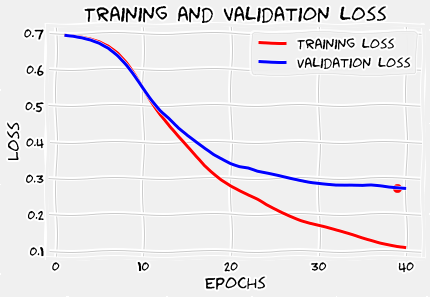

In [ ]:
import matplotlib.pyplot as plt
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
# print(loss_value,len(loss_value))
# val_loss_value
epochs = np.arange(1,41)
plt.xkcd()
plt.style.use('fivethirtyeight')
plt.plot(epochs, loss_value, 'r', label='Training loss',linewidth=3) #bo:blue dot藍點
plt.plot(epochs, val_loss_value, 'b', label='Validation loss',linewidth=3) #b: blue藍色
plt.scatter([val_loss_value.index(min(val_loss_value))], [min(val_loss_value)],s=70,color="r")
# plt.scatter([0.5],[2])
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

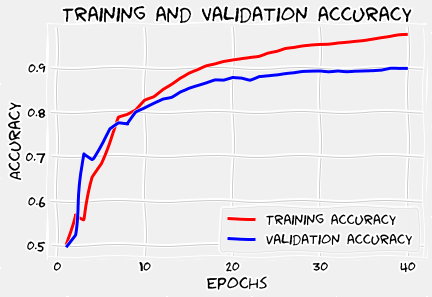

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
# print(loss_value,len(loss_value))
# val_loss_value
epochs = np.arange(1,41)
plt.xkcd()
plt.style.use('fivethirtyeight')
plt.plot(epochs, acc, 'r', label='Training accuracy',linewidth=3) #bo:blue dot藍點
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',linewidth=3) #b: blue藍色
# plt.scatter([val_loss_value.index(min(val_loss_value))], [min(val_loss_value)],s=70,color="r")
# plt.scatter([0.5],[2])
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
val_loss_value.index(min(val_loss_value))
val_loss_value[20]

0.3336305320262909

In [ ]:
# model_best.save("model.h5")
model.save("model.h5")

## Preprocess the data we craw

In [ ]:
def clean_string(s):
    """
    Modifying multiple lines string into one string with a proper form
    """
    result = list(s.strip())
    # print(result,"\n")
    for i in range(len(result)):
        if result[i] == '\n':
            result[i] = " "
    result = "".join(result)
    result = result.replace(".", "").replace(",", "").replace("(", "").replace(")", "").replace(":", "").replace("\n", "").replace("\"", "").replace("<", "").replace(">", "").split(" ")
    result = list(filter(("").__ne__, result))
    return result

In [ ]:
def review_encode(s):
    encoded = [1]
    for word in s:
        if word.lower() in word_index:  # word_index gives numbers
            encoded.append(word_index[word.lower()])
        else:
            encoded.append(2)  # 2 stands for UNK
    return encoded

In [ ]:
model = keras.models.load_model("model.h5")
model

In [ ]:
data_out = df_filter

In [ ]:
data_out

,title,review,rate,positive/negative
0,"Necessary to watch twice, preferably with sub...",Its somewhat ironic that a movie about time tr...,8,1
1,"Disappointing at first watch, Masterpiece at ...",Its one hell of a complicated film. It will be...,9,1
2,I think I'm dumb,"Well, I've always known I was a little slow to...",7,1
3,Spectacular. But only Nolan and Schrödinger's...,Tenet is the long awaited new movie from Chris...,7,1
4,"Brief, Non-Spoiler review","As this will be non-spoiler, I can't say too m...",9,1
5,Brilliant Film,"If you can, get to a cinema and watch Tenet.If...",9,1
6,An absolute masterpiece!,"At first, I want to ask Christopher Nolan one ...",9,1
7,Tenet is built like a puzzle with a story tha...,It's been a long and bumpy road to release but...,9,1
8,Christopher Nolan does it again,One of Christopher Nolan's most fascinating mo...,10,1
9,Pseudo-intellectual mindless action/WASTE OF ...,"Big Nolan fan here. Doodlebug, Memento, The Pr...",5,0


## Use review as training data

In [ ]:
x = data_out["review"]
y = data_out["positive/negative"]

In [ ]:
count = 0
predict_list = []
wrong_prediction = []
for i in range(len(data_out)):
    data_preprocess = clean_string(x[i])
    encode = review_encode(data_preprocess)
    encode = keras.preprocessing.sequence.pad_sequences([encode], value=word_index["<PAD>"], padding="post", maxlen=1000)
    predict = model.predict(encode)
    predict_list.append(float(predict[0]))
    
    if round(float(predict[0])) == y[i]:
        count += 1
        print(f"{i} data\t  Predict: {str(predict[0]):<15}\t Actual: {y[i]}")
    else:
        wrong_prediction.append(i)
        print(f"{i} data\t  Predict: {str(predict[0]):<15}\t Actual: {y[i]}\twrong answer")
    
print(f"The accuracy of the external data is {count/len(data_out)}")
print(wrong_prediction)
print(predict_list)

0 data	  Predict: [0.8062784]    	 Actual: 1
1 data	  Predict: [0.9983094]    	 Actual: 1
2 data	  Predict: [0.53322905]   	 Actual: 1
3 data	  Predict: [0.87193996]   	 Actual: 1
4 data	  Predict: [0.97635794]   	 Actual: 1
5 data	  Predict: [0.91983175]   	 Actual: 1
6 data	  Predict: [0.43937686]   	 Actual: 1	wrong answer
7 data	  Predict: [0.74024636]   	 Actual: 1
8 data	  Predict: [0.9418785]    	 Actual: 1
9 data	  Predict: [0.00153288]   	 Actual: 0
10 data	  Predict: [0.00353593]   	 Actual: 0
11 data	  Predict: [0.45121515]   	 Actual: 1	wrong answer
12 data	  Predict: [0.07461494]   	 Actual: 0
13 data	  Predict: [0.64808536]   	 Actual: 0	wrong answer
14 data	  Predict: [0.0140745]    	 Actual: 0
15 data	  Predict: [0.04535085]   	 Actual: 0
16 data	  Predict: [0.7880637]    	 Actual: 1
17 data	  Predict: [0.7162956]    	 Actual: 1
18 data	  Predict: [0.8278575]    	 Actual: 1
19 data	  Predict: [0.5281555]    	 Actual: 1
20 data	  Predict: [0.00816855]   	 Actual: 0
21 da

#### Accuracy = 73.91% for review data
#### Compare the prediction with the rate

In [ ]:
data_out['predict'] = predict_list
data_out

,title,review,rate,positive/negative,predict
0,"Necessary to watch twice, preferably with sub...",Its somewhat ironic that a movie about time tr...,8,1,0.806278
1,"Disappointing at first watch, Masterpiece at ...",Its one hell of a complicated film. It will be...,9,1,0.998309
2,I think I'm dumb,"Well, I've always known I was a little slow to...",7,1,0.533229
3,Spectacular. But only Nolan and Schrödinger's...,Tenet is the long awaited new movie from Chris...,7,1,0.871940
4,"Brief, Non-Spoiler review","As this will be non-spoiler, I can't say too m...",9,1,0.976358
5,Brilliant Film,"If you can, get to a cinema and watch Tenet.If...",9,1,0.919832
6,An absolute masterpiece!,"At first, I want to ask Christopher Nolan one ...",9,1,0.439377
7,Tenet is built like a puzzle with a story tha...,It's been a long and bumpy road to release but...,9,1,0.740246
8,Christopher Nolan does it again,One of Christopher Nolan's most fascinating mo...,10,1,0.941878
9,Pseudo-intellectual mindless action/WASTE OF ...,"Big Nolan fan here. Doodlebug, Memento, The Pr...",5,0,0.001533


### Use title as training data

In [ ]:
x = data_out["title"]
y = data_out["positive/negative"]

In [ ]:
count = 0
predict_list = []
wrong_prediction = []
for i in range(len(data_out)):
    data_preprocess = clean_string(x[i])
    encode = review_encode(data_preprocess)
    encode = keras.preprocessing.sequence.pad_sequences([encode], value=word_index["<PAD>"], padding="post", maxlen=850)
    predict = model.predict(encode)
    predict_list.append(float(predict[0]))

    if round(float(predict[0])) == y[i]:
        count += 1
        print(f"{i} data\t  Predict: {str(predict[0]):<13}\t Actual: {y[i]}")
    else:
        wrong_prediction.append(i)
        print(f"{i} data\t  Predict: {str(predict[0]):<13}\t Actual: {y[i]}\twrong answer")
    
print(f"The accuracy of the external data is {count/len(data_out)}")
print(wrong_prediction)
print(predict_list)

0 data	  Predict: [0.6538274]  	 Actual: 1
1 data	  Predict: [0.48922712] 	 Actual: 1	wrong answer
2 data	  Predict: [0.40454543] 	 Actual: 1	wrong answer
3 data	  Predict: [0.43215293] 	 Actual: 1	wrong answer
4 data	  Predict: [0.48079145] 	 Actual: 1	wrong answer
5 data	  Predict: [0.59381807] 	 Actual: 1
6 data	  Predict: [0.42150208] 	 Actual: 1	wrong answer
7 data	  Predict: [0.32339475] 	 Actual: 1	wrong answer
8 data	  Predict: [0.49362707] 	 Actual: 1	wrong answer
9 data	  Predict: [0.56478274] 	 Actual: 0	wrong answer
10 data	  Predict: [0.33905834] 	 Actual: 0
11 data	  Predict: [0.47053698] 	 Actual: 1	wrong answer
12 data	  Predict: [0.3839801]  	 Actual: 0
13 data	  Predict: [0.47224647] 	 Actual: 0
14 data	  Predict: [0.40717608] 	 Actual: 0
15 data	  Predict: [0.48485532] 	 Actual: 0
16 data	  Predict: [0.4024902]  	 Actual: 1	wrong answer
17 data	  Predict: [0.20361596] 	 Actual: 1	wrong answer
18 data	  Predict: [0.4534143]  	 Actual: 1	wrong answer
19 data	  Predict:


#### Accuracy = 52.17% for title data  :(((((
#### Compare the prediction with the rate

In [ ]:
data_out['predict_by_title'] = predict_list
data_out

,title,review,rate,positive/negative,predict,predict_by_title
0,"Necessary to watch twice, preferably with sub...",Its somewhat ironic that a movie about time tr...,8,1,0.806278,0.653827
1,"Disappointing at first watch, Masterpiece at ...",Its one hell of a complicated film. It will be...,9,1,0.998309,0.489227
2,I think I'm dumb,"Well, I've always known I was a little slow to...",7,1,0.533229,0.404545
3,Spectacular. But only Nolan and Schrödinger's...,Tenet is the long awaited new movie from Chris...,7,1,0.871940,0.432153
4,"Brief, Non-Spoiler review","As this will be non-spoiler, I can't say too m...",9,1,0.976358,0.480791
5,Brilliant Film,"If you can, get to a cinema and watch Tenet.If...",9,1,0.919832,0.593818
6,An absolute masterpiece!,"At first, I want to ask Christopher Nolan one ...",9,1,0.439377,0.421502
7,Tenet is built like a puzzle with a story tha...,It's been a long and bumpy road to release but...,9,1,0.740246,0.323395
8,Christopher Nolan does it again,One of Christopher Nolan's most fascinating mo...,10,1,0.941878,0.493627
9,Pseudo-intellectual mindless action/WASTE OF ...,"Big Nolan fan here. Doodlebug, Memento, The Pr...",5,0,0.001533,0.564783


## Conclusion
- Never judge by appearance
- Manually rate for reviews may be biased
- Using dataset with multiple labels on binary classification may occasionally fail
- Deep neural network with excessive hidden layers may casue overfitting.

## Type sentence to test the classifier
- to see whether it can work well on some simple conversation

In [ ]:
s = input()
while s != "q":
  data_preprocess = clean_string(s)
  encode = review_encode(data_preprocess)
  encode = keras.preprocessing.sequence.pad_sequences([encode], value=word_index["<PAD>"], padding="post", maxlen=850)
  predict = model.predict(encode)
  print(predict)
  s = input()

I am happy
[[0.48805806]]
I am very happy now
[[0.5776955]]
Deadpool is a triumph of artistic vision over studio interference. Little credit should be given to 20th Century Fox, as they had zero faith in the success of a Deadpool movie. To put things into perspective, Ryan Reynolds fought for this film back in 2004 when Blade: Trinity was released. Reynolds and co. went to shoot test footage that was then leaked online by Reynolds because Fox had no intentions to release it to the public. Finally, after years and years of BEGGING to the studio and the overwhelming positive responses of the test footage from the public, Fox didn't even tell Reynolds and co. that the film was greenlit. They had to find out online like the rest of us plebeians. If that sounds bad, Fox even cut their budget by $7 million AT THE LAST MINUTE, which caused the writers to scratch some action sequences that I'm sure would've been great to see.  Deadpool now has the biggest opening weekend in the month of Februa

## Conclusion
- The imdb classifier ***cannot*** distinguish the sentiment on simple conversation
- Conjucture
  - Since the training data of imdb classifier have many words and create a large word vector, and is reasonable to affect the precision on word vectors only possess 1 sentence.
  -  Sentiment on reviews may be biased since they are rated subjectively. Besides, simple conversations may occasionally possess less sentiment, that is to say, its state is neutral.

## Try deadpool reviews on imdb
### Using the same process as above

In [ ]:
session_request = requests.session()
url = "https://www.imdb.com/title/tt1431045/reviews?ref_=tt_urv"
response = session_request.get(url)
# print(response)
soup = BeautifulSoup(response.text, "html.parser")
element_title = soup.select("a.title")
title_list = []
for item in element_title:
  text = item.text.replace("\n",'')
  title_list.append(text)
title_list

[' Dirty, funny, sexy, violent and unabashedly romantic: Deadpool has arrived!',
 ' This is what it looks like when filmmakers take risks',
 ' "Bad Deadpool - Good Deadpool Film!"',
 ' Great movie, funny, good story, a must see',
 ' a much needed breath of fresh air in a stale genre',
 ' Best Movie I Have Seen In A Long Time',
 ' Funny, entertaining and refreshing',
 ' Simply Excellent.',
 ' Well, blow me!',
 ' Defend the 10 again',
 " Unpopular Opinion: This film isn't that good.",
 ' Hell yeah!',
 ' Boring and Pointless',
 ' I laughed twice, the rest was rubbish.',
 ' Worst Marvel movie ever made',
 ' Just non stop jokes that mainly fall flat (NO Spoilers)',
 ' Film should have a maximum age limit of 10',
 ' Waste of Time and Money',
 ' Pathetic, violent, pointless movie',
 ' A simple summary (without the spoilers); what you need to know',
 ' Terrible',
 ' A new landmark for superhero and comedy films',
 ' Worst Marvel Movie Ever',
 ' A flawed non-Deadpool movie with Deadpool jokes',

In [ ]:
element_rate = soup.select("div.ipl-ratings-bar span span")
element_rate_test = soup.select("div.lister-item-content")  # check in advance
"ipl-ratings-bar" in str(element_rate_test[0]) # check whether the reivew contain rating bar
rate_test_list = []
for item in element_rate_test:
  if "ipl-ratings-bar" not in str(item):
    rate_test_list.append(int(-1))
  else:
    rate_test_list.append(int(item.span.span.text))
  # print(str(item))
print(rate_test_list)
# for i in rate_test_list:
#   print(i,type(i))

[-1, 8, 9, 9, 8, 10, 8, 10, 8, 10, 5, 10, 1, 3, 1, 2, 1, 1, 1, 1, 1, 9, 1, 2, 1]


In [ ]:
print(len(rate_test_list),len(title_list))

25 25


In [ ]:
element_review = soup.select("div.text.show-more__control")
# element_review
review_list = []
for item in element_review:
  review_list.append(item.text)
  # print(str(item))
review_list

["I really, really liked Deadpool. And you know what? I didn't expect to. Seriously, I was never a fan of the character (in the sense that I hardly knew anything about him) and the humor as well as the violence seemed forced and overdone in the trailers. Still, I remained interested in the film, I just never expected it to actually be good - until the reviews arrived. After most critics unexpectedly showered this newest superhero movie with praise, I went in cautiously optimistic (but still fully prepared to hate the film).The first thing I noticed was how inventive the storytelling is. The film throws you into the action from the first moment (literally: the very first moment) and then it goes back and forth in brilliant and unexpected ways to slowly unspool the story of this insane - but oddly charming - antihero. Flashbacks and fast-forwards can be annoying as hell, but when done right, they can help render even a somewhat simple story fresh and exciting. And that's exactly how Dead

In [ ]:
out = f"""
review length: {len(review_list)}
rate length: {len(rate_test_list)}
title length: {len(title_list)}
"""
# print(f"review {len(review_list)},len(rate_test_list),len(title_list)")
print(out)
# print(rate_list)


review length: 25
rate length: 25
title length: 25



In [ ]:
df = pd.DataFrame(np.c_[title_list,review_list,rate_test_list],columns = ["title","review","rate"])
df

,title,review,rate
0,"Dirty, funny, sexy, violent and unabashedly r...","I really, really liked Deadpool. And you know ...",-1
1,This is what it looks like when filmmakers ta...,Deadpool is a triumph of artistic vision over ...,8
2,"""Bad Deadpool - Good Deadpool Film!""","If anyone else could be cast to play Deadpool,...",9
3,"Great movie, funny, good story, a must see","Before Logan, this was my favorite non-MCU mar...",9
4,a much needed breath of fresh air in a stale ...,"At first glance, Deadpool seems like a typical...",8
5,Best Movie I Have Seen In A Long Time,Firstly I would like to state that it is compl...,10
6,"Funny, entertaining and refreshing",I am aware that to many people (especially tho...,8
7,Simply Excellent.,Deadpool is a 2016 film that the eighth film i...,10
8,"Well, blow me!",Let me say at the very beginning of this revie...,8
9,Defend the 10 again,I've said it in other reviews that no movie is...,10


In [ ]:
df["rate"] = df["rate"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   25 non-null     object
 1   review  25 non-null     object
 2   rate    25 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 728.0+ bytes


In [ ]:
condition = df["rate"] > 0
df_filter = df[condition]
df_filter

,title,review,rate
1,This is what it looks like when filmmakers ta...,Deadpool is a triumph of artistic vision over ...,8
2,"""Bad Deadpool - Good Deadpool Film!""","If anyone else could be cast to play Deadpool,...",9
3,"Great movie, funny, good story, a must see","Before Logan, this was my favorite non-MCU mar...",9
4,a much needed breath of fresh air in a stale ...,"At first glance, Deadpool seems like a typical...",8
5,Best Movie I Have Seen In A Long Time,Firstly I would like to state that it is compl...,10
6,"Funny, entertaining and refreshing",I am aware that to many people (especially tho...,8
7,Simply Excellent.,Deadpool is a 2016 film that the eighth film i...,10
8,"Well, blow me!",Let me say at the very beginning of this revie...,8
9,Defend the 10 again,I've said it in other reviews that no movie is...,10
10,Unpopular Opinion: This film isn't that good.,The long awaited Deadpool is finally and with ...,5


In [ ]:
df_filter = df_filter.reset_index(drop=True)
df_filter

,title,review,rate
0,This is what it looks like when filmmakers ta...,Deadpool is a triumph of artistic vision over ...,8
1,"""Bad Deadpool - Good Deadpool Film!""","If anyone else could be cast to play Deadpool,...",9
2,"Great movie, funny, good story, a must see","Before Logan, this was my favorite non-MCU mar...",9
3,a much needed breath of fresh air in a stale ...,"At first glance, Deadpool seems like a typical...",8
4,Best Movie I Have Seen In A Long Time,Firstly I would like to state that it is compl...,10
5,"Funny, entertaining and refreshing",I am aware that to many people (especially tho...,8
6,Simply Excellent.,Deadpool is a 2016 film that the eighth film i...,10
7,"Well, blow me!",Let me say at the very beginning of this revie...,8
8,Defend the 10 again,I've said it in other reviews that no movie is...,10
9,Unpopular Opinion: This film isn't that good.,The long awaited Deadpool is finally and with ...,5


In [ ]:
# binary = 1 if df_filter["rate"] > 5 else 0
def binary(column):
  bin = []
  for i in range(len(column)):
    if column[i] > 5:
      bin.append(1)
    else:
      bin.append(0)
  return np.array(bin)
bin = binary(df_filter["rate"])
df_filter['positive/negative'] = bin
df_filter

,title,review,rate,positive/negative
0,This is what it looks like when filmmakers ta...,Deadpool is a triumph of artistic vision over ...,8,1
1,"""Bad Deadpool - Good Deadpool Film!""","If anyone else could be cast to play Deadpool,...",9,1
2,"Great movie, funny, good story, a must see","Before Logan, this was my favorite non-MCU mar...",9,1
3,a much needed breath of fresh air in a stale ...,"At first glance, Deadpool seems like a typical...",8,1
4,Best Movie I Have Seen In A Long Time,Firstly I would like to state that it is compl...,10,1
5,"Funny, entertaining and refreshing",I am aware that to many people (especially tho...,8,1
6,Simply Excellent.,Deadpool is a 2016 film that the eighth film i...,10,1
7,"Well, blow me!",Let me say at the very beginning of this revie...,8,1
8,Defend the 10 again,I've said it in other reviews that no movie is...,10,1
9,Unpopular Opinion: This film isn't that good.,The long awaited Deadpool is finally and with ...,5,0


In [ ]:
data_out = df_filter
x = data_out["review"]
y = data_out["positive/negative"]

In [ ]:
count = 0
predict_list = []
wrong_prediction = []
for i in range(len(data_out)):
    data_preprocess = clean_string(x[i])
    encode = review_encode(data_preprocess)
    encode = keras.preprocessing.sequence.pad_sequences([encode], value=word_index["<PAD>"], padding="post", maxlen=1000)
    predict = model.predict(encode)
    predict_list.append(float(predict[0]))
    
    if round(float(predict[0])) == y[i]:
        count += 1
        print(f"{i} data\t  Predict: {str(predict[0]):<15}\t Actual: {y[i]}")
    else:
        wrong_prediction.append(i)
        print(f"{i} data\t  Predict: {str(predict[0]):<15}\t Actual: {y[i]}\twrong answer")
    
print(f"The accuracy of the external data is {count/len(data_out)}")
print(wrong_prediction)
print(predict_list)

0 data	  Predict: [0.8038442]    	 Actual: 1
1 data	  Predict: [0.9994937]    	 Actual: 1
2 data	  Predict: [0.9870297]    	 Actual: 1
3 data	  Predict: [0.9769831]    	 Actual: 1
4 data	  Predict: [0.07752249]   	 Actual: 1	wrong answer
5 data	  Predict: [0.8740139]    	 Actual: 1
6 data	  Predict: [0.00767127]   	 Actual: 1	wrong answer
7 data	  Predict: [0.11198837]   	 Actual: 1	wrong answer
8 data	  Predict: [0.85109985]   	 Actual: 1
9 data	  Predict: [0.95131564]   	 Actual: 0	wrong answer
10 data	  Predict: [0.99925053]   	 Actual: 1
11 data	  Predict: [0.13582763]   	 Actual: 0
12 data	  Predict: [0.45074794]   	 Actual: 0
13 data	  Predict: [0.02413699]   	 Actual: 0
14 data	  Predict: [0.01220423]   	 Actual: 0
15 data	  Predict: [0.0060285]    	 Actual: 0
16 data	  Predict: [0.00384197]   	 Actual: 0
17 data	  Predict: [0.01134938]   	 Actual: 0
18 data	  Predict: [0.6351083]    	 Actual: 0	wrong answer
19 data	  Predict: [0.18531656]   	 Actual: 0
20 data	  Predict: [0.880

In [ ]:
data_out['predict'] = predict_list
data_out

,title,review,rate,positive/negative,predict
0,This is what it looks like when filmmakers ta...,Deadpool is a triumph of artistic vision over ...,8,1,0.803844
1,"""Bad Deadpool - Good Deadpool Film!""","If anyone else could be cast to play Deadpool,...",9,1,0.999494
2,"Great movie, funny, good story, a must see","Before Logan, this was my favorite non-MCU mar...",9,1,0.987030
3,a much needed breath of fresh air in a stale ...,"At first glance, Deadpool seems like a typical...",8,1,0.976983
4,Best Movie I Have Seen In A Long Time,Firstly I would like to state that it is compl...,10,1,0.077522
5,"Funny, entertaining and refreshing",I am aware that to many people (especially tho...,8,1,0.874014
6,Simply Excellent.,Deadpool is a 2016 film that the eighth film i...,10,1,0.007671
7,"Well, blow me!",Let me say at the very beginning of this revie...,8,1,0.111988
8,Defend the 10 again,I've said it in other reviews that no movie is...,10,1,0.851100
9,Unpopular Opinion: This film isn't that good.,The long awaited Deadpool is finally and with ...,5,0,0.951316


In [ ]:
x = data_out["title"]
y = data_out["positive/negative"]

In [ ]:
count = 0
predict_list = []
wrong_prediction = []
for i in range(len(data_out)):
    data_preprocess = clean_string(x[i])
    encode = review_encode(data_preprocess)
    encode = keras.preprocessing.sequence.pad_sequences([encode], value=word_index["<PAD>"], padding="post", maxlen=850)
    predict = model.predict(encode)
    predict_list.append(float(predict[0]))

    if round(float(predict[0])) == y[i]:
        count += 1
        print(f"{i} data\t  Predict: {str(predict[0]):<13}\t Actual: {y[i]}")
    else:
        wrong_prediction.append(i)
        print(f"{i} data\t  Predict: {str(predict[0]):<13}\t Actual: {y[i]}\twrong answer")
    
print(f"The accuracy of the external data is {count/len(data_out)}")
print(wrong_prediction)
print(predict_list)

0 data	  Predict: [0.428556]   	 Actual: 1	wrong answer
1 data	  Predict: [0.3920558]  	 Actual: 1	wrong answer
2 data	  Predict: [0.73737925] 	 Actual: 1
3 data	  Predict: [0.52804404] 	 Actual: 1
4 data	  Predict: [0.60205036] 	 Actual: 1
5 data	  Predict: [0.7029217]  	 Actual: 1
6 data	  Predict: [0.54864365] 	 Actual: 1
7 data	  Predict: [0.5630808]  	 Actual: 1
8 data	  Predict: [0.57960635] 	 Actual: 1
9 data	  Predict: [0.52803534] 	 Actual: 0	wrong answer
10 data	  Predict: [0.47220552] 	 Actual: 1	wrong answer
11 data	  Predict: [0.24922186] 	 Actual: 0
12 data	  Predict: [0.38399646] 	 Actual: 0
13 data	  Predict: [0.35919154] 	 Actual: 0
14 data	  Predict: [0.21669003] 	 Actual: 0
15 data	  Predict: [0.43230557] 	 Actual: 0
16 data	  Predict: [0.26220065] 	 Actual: 0
17 data	  Predict: [0.2430706]  	 Actual: 0
18 data	  Predict: [0.67791474] 	 Actual: 0	wrong answer
19 data	  Predict: [0.36177307] 	 Actual: 0
20 data	  Predict: [0.5831199]  	 Actual: 1
21 data	  Predict: [0